# Assignment nº2
### Implementation and Analysis of Decision Tree Induction for Supervised Machine Learning
#### Work assembled by Alejandro Gonçalves, Francisca Mihalache and Pedro Fernandes

### Table of contents

1. [Introduction](#introduction)
2. [Datasets](#datasets)
   - 2.1. [Restaurant](#restaurant)
   - 2.2. [Weather](#weather)
   - 2.3. [Iris](#iris)
   - 2.4. [Connect4](#connect4)
3. [ID3](#id3)
4. [Decision Tree's Implementation](#dt-implementation)
5. [ID3 Implementation](#id3-implementation)
6. [Results/Predictions??](#results)
7. [Conclusions](#conclusions)

## Introduction
The goal is to implement the ID3 algorithm to learn decision trees from data, ensuring the program can both build the tree and classify new instances across different datasets, without using automatic libraries. The focus is on mastering the theoretical concepts and practically applying them to solve classification tasks effectively.

### Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Datasets
[[go back to the top]](#table-of-contents)

In this section, we will dive into the details of our datasets, exploring the nature of the data, the predictive outcomes they are associated with, and their respective roles in our analysis.

### Restaurant
[[go back to the topic]](#datasets)

The 'restaurant' dataset records dining experiences across various establishments. Each entry is characterized by a unique identifier (ID) and attributes such as the availability of alternative dining (Alt), presence of a bar (Bar), whether it is a Friday (Fri), customer's hunger level (Hun), patron density (Pat), price range (Price), rainy weather condition (Rain), reservation availability (Res), type of cuisine (Type), and estimated waiting time (Est). The target variable (Class) indicates whether a customer will decide to wait for a table ('Yes') or not ('No'). By analyzing these factors, our objective is to predict customer waiting decisions and gain insights into the influential factors that affect these decisions in the restaurant industry

#### Data Cleanup


In [61]:
df1 = pd.read_csv('restaurant.csv')
df1.head()

,ID,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,X1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,X2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,X3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,X4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,X5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


#### Missing Values
Checking if there's any missing values

In [62]:
print(df1.isnull().sum())

ID       0
Alt      0
Bar      0
Fri      0
Hun      0
Pat      2
Price    0
Rain     0
Res      0
Type     0
Est      0
Class    0
dtype: int64


#### Mapping Booleans to Integers

In [63]:
df1['Alt'] = df1['Alt'].replace({'No': 0, 'Yes': 1})
df1['Bar'] = df1['Bar'].replace({'No': 0, 'Yes': 1})
df1['Fri'] = df1['Fri'].replace({'No': 0, 'Yes': 1})
df1['Hun'] = df1['Hun'].replace({'No': 0, 'Yes': 1})
df1['Rain'] = df1['Rain'].replace({'No': 0, 'Yes': 1})
df1['Res'] = df1['Res'].replace({'No': 0, 'Yes': 1})
df1['Class'] = df1['Class'].replace({'No': 0, 'Yes': 1})
df1['Price'] = df1['Price'].replace({'$':0, '$$':1,'$$$':2})
#df1['Pat'] = df1['Pat'].replace({'None':0, 'Some':1, 'Full':2})
df1['Type'] = df1['Type'].replace({'French':0, 'Thai':1,'Burger':2,'Italian':3})
est_mapping = {'0-10': 0, '10-30': 1, '30-60': 2, '>60': 3}
df1['Est'] = df1['Est'].replace(est_mapping)
# Função para mapear 'Pat' para inteiros
def map_pat_to_int(value):
    mapping = {'None': 0, 'Some': 1, 'Full': 2}
    # Use o método get() para lidar com valores que não estão no mapeamento
    return mapping.get(value, -1)  # Retorna -1 para qualquer valor não reconhecido

# Aplica a função à coluna 'Pat'
df1['Pat'] = df1['Pat'].apply(map_pat_to_int)
df1 = df1.drop('ID', axis=1)
df1.head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_27708\3409166229.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Alt'] = df1['Alt'].replace({'No': 0, 'Yes': 1})
C:\Users\aleja\AppData\Local\Temp\ipykernel_27708\3409166229.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Bar'] = df1['Bar'].replace({'No': 0, 'Yes': 1})
C:\Users\aleja\AppData\Local\Temp\ipykernel_27708\3409166229.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expli

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,1,0,0,1,1,2,0,1,0,0,1
1,1,0,0,1,2,0,0,0,1,2,0
2,0,1,0,0,1,0,0,0,2,0,1
3,1,0,1,1,2,0,0,0,1,1,1
4,1,0,1,0,2,2,0,1,0,3,0


#### Creating a **scatterplot matrix**

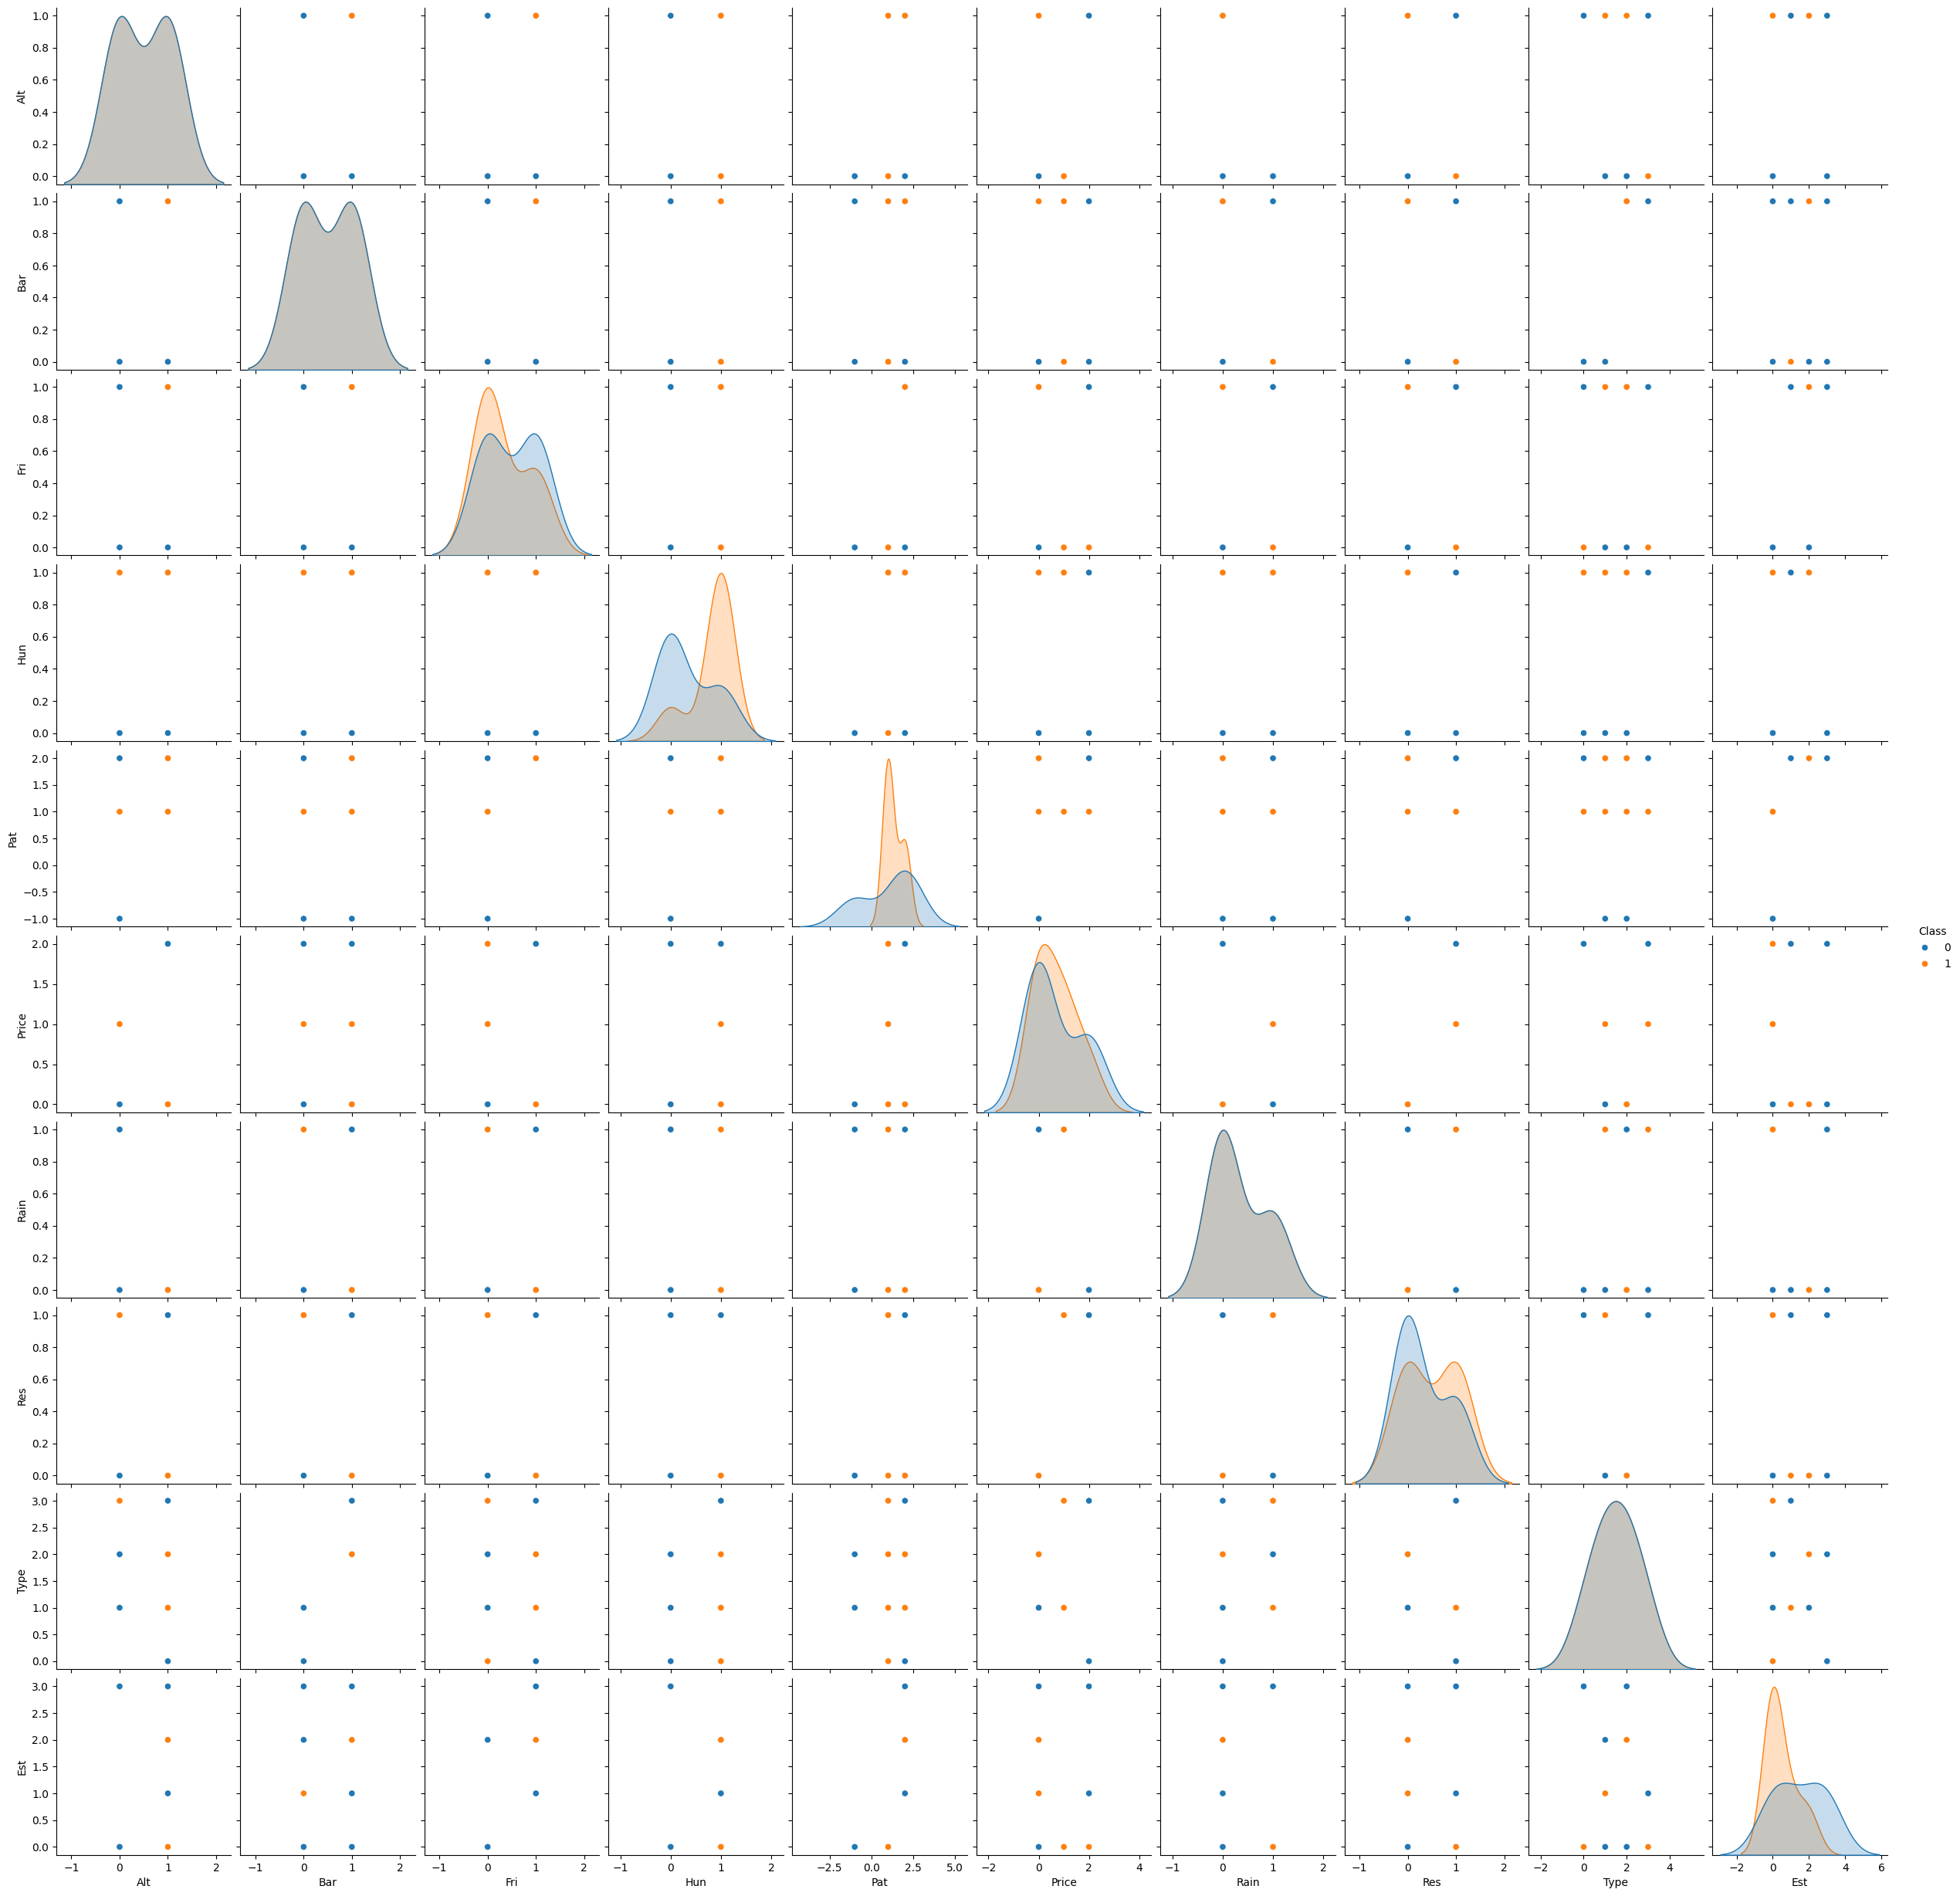

In [64]:
sb.pairplot(df1.dropna(), hue='Class')


### Weather
[[go back to the topic]](#datasets)

The 'weather' dataset encompasses a range of meteorological conditions and their impact on the decision to engage in an outdoor activity, specifically playing a sport. The dataset contains records identified by an ID, along with attributes including Weather conditions (sunny, overcast, rainy), Temperature (Temp), Humidity levels, Wind presence (Windy), and the decision to Play or not. The objective with this dataset is to discern patterns and deduce the optimal weather conditions that favor the decision to play, enhancing our understanding of how weather variables influence outdoor recreational activities.

#### Data Cleanup

In [65]:
df2 = pd.read_csv('weather.csv')
df2.head()

,ID,Weather,Temp,Humidity,Windy,Play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes


#### Mapping Booleans to Integers

In [66]:
df2['Windy'] = df2['Windy'].replace({False: 0, True: 1})
df2['Weather'] = df2['Weather'].replace({'sunny':0, 'overcast':1,'rainy':2})
df2['Play'] = df2['Play'].replace({'no':0, 'yes':1})
df2 = df2.drop('ID', axis=1)
df2.head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_27708\1830648448.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Windy'] = df2['Windy'].replace({False: 0, True: 1})
C:\Users\aleja\AppData\Local\Temp\ipykernel_27708\1830648448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Weather'] = df2['Weather'].replace({'sunny':0, 'overcast':1,'rainy':2})
C:\Users\aleja\AppData\Local\Temp\ipykernel_27708\1830648448.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

,Weather,Temp,Humidity,Windy,Play
0,0,85,85,0,0
1,0,80,90,1,0
2,1,83,86,0,1
3,2,70,96,0,1
4,2,68,80,0,1


#### Missing values
Checking if there's any missing values

In [67]:
print(df2.isnull().sum())

Weather     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64


#### Creating a **scatterplot matrix**

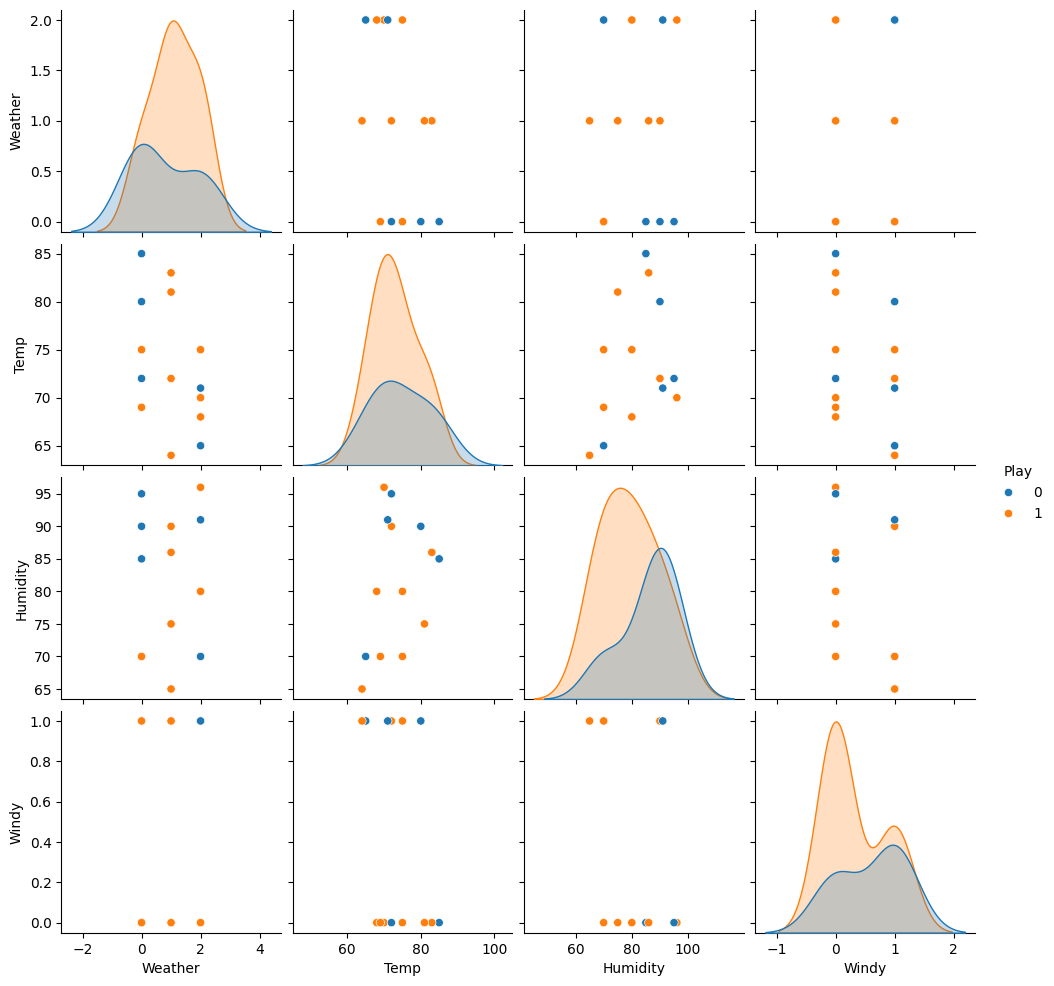

In [68]:
sb.pairplot(df2.dropna(), hue='Play')


### Iris
[[go back to the topic]](#datasets)

The 'iris' dataset, which is renowned for its role in pattern recognition literature, records the morphological measurements of iris flowers, including sepal length, sepal width, petal length, and petal width. Each entry, marked by an ID, captures these features and classifies the iris into one of three species: Iris-setosa, Iris-versicolor, or Iris-virginica. The task at hand is to employ these attributes to accurately predict the class of iris, showcasing the intricate relationship between the flower's physical characteristics and its species.

In [69]:
df3 = pd.read_csv('iris.csv')
df3.head()

,ID,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Missing Values
Checking if there's any missing values

In [70]:
print(df3.isnull().sum())

ID             0
sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


In [71]:
df3 = df3.drop('ID', axis=1)
df3.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Creating a **scatterplot matrix**

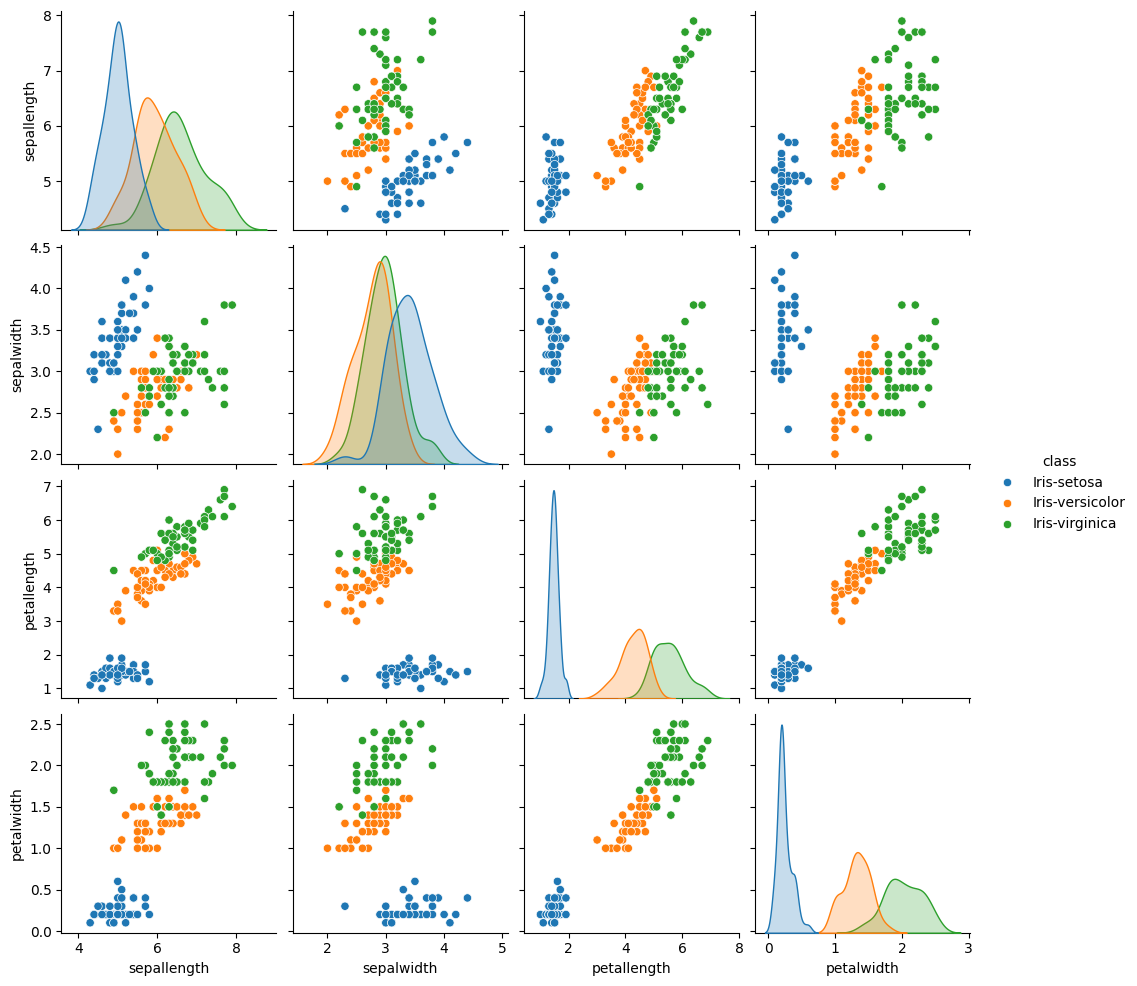

In [72]:
sb.pairplot(df3.dropna(), hue='class')


### Connect4
[[go back to the topic]](#datasets)

The 'connect4' dataset consists of multiple instances representing game states of the Connect Four game. The dataset captures various board configurations, each with a set of features describing the occupancy of each cell by a 'red' or 'yellow' disc, or indicating an empty cell. The objective is to use these configurations to predict the outcome of the game—whether it ends in a win for the first player, a win for the second player, or a draw. 

Não percebi muito bem este csv tbh, pedi ao chat

In [73]:
df4 = pd.read_csv('connect4.csv')
df4.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


#### Missing Values
Checking if there's any missing values

In [74]:
print(df4.isnull().sum())

b       0
b.1     0
b.2     0
b.3     0
b.4     0
b.5     0
b.6     0
b.7     0
b.8     0
b.9     0
b.10    0
b.11    0
x       0
o       0
b.12    0
b.13    0
b.14    0
b.15    0
x.1     0
o.1     0
x.2     0
o.2     0
x.3     0
o.3     0
b.16    0
b.17    0
b.18    0
b.19    0
b.20    0
b.21    0
b.22    0
b.23    0
b.24    0
b.25    0
b.26    0
b.27    0
b.28    0
b.29    0
b.30    0
b.31    0
b.32    0
b.33    0
win     0
dtype: int64


# ID3 
[[go back to the top]](#table-of-contents)


The ID3 decision tree algorithm strategically employs Information Gain to identify optimal points for splitting the data during the tree-building process. This selection is crucial as it influences the algorithm's ability to accurately classify data. To quantify Information Gain, the concept of Entropy is of crucial importance. By calculating Entropy, we can evaluate the effectiveness of each potential split in reducing uncertainty, guiding the decision tree to more effective and informed splits that enhance classification performance.

### Outline of ID3 Algorithm for Decision Tree Construction:

#### Initial Entropy Calculation:
- **Definition of Entropy:** Measures the amount of uncertainity in dataset.
- **Entropy Calculation Formula:**
$$
Entropy(S) = -\frac{p}{p+n} \log_2 \left(\frac{p}{p+n}\right) - \frac{n}{p+n} \log_2 \left(\frac{n}{p+n}\right)
$$

#### Attribute Evaluation:
- **Entropy for Attributes:** Assess the entropy for each individual attribute across all possible values.
- **Average Entropy Computation:** Aggregate the entropies to find the mean entropy across all attributes.
  - **Average Entropy Formula:**
  $$
  I(Attribute) = \sum \left(\frac{pi + ni}{p + n}\right) Entropy(A)
  $$

#### Information Gain Assessment:
- **Information Gain Calculation:** Determine the gain in information by computing the change in entropy before and after partitioning the dataset based on an attribute.
  - **Information Gain Formula:**
  $$
  Gain = Entropy(S) - I(Attribute)
  $$

#### Attribute Selection:
- **Optimal Attribute Choice:** Select the attribute with the maximal information gain for splitting.

#### Iterative Process:
- **Repetition Until Completion:** Continue the process iteratively to construct the desired decision tree structure.
